In [1]:
'''
Dec 5, 2016
Crawler from YAHOO finance
Chi-Lun Mai
'''

%matplotlib inline
from yahoo_finance import Share

yahoo = Share('YHOO')
datatemp = yahoo.get_historical('2015-01-01', '2015-12-31')
datatemp2 = yahoo.get_historical('2016-01-01', '2016-01-31')
data = []
for i in range(len(datatemp)):
    data.append(datatemp[len(datatemp)-i-1])

data_testSVR = []
for i in range(len(datatemp2)):
    data_testSVR.append(datatemp2[len(datatemp2)-i-1])
    
# Store feature in numpy-array form.
# Delete the non-number data(Symbol, Date).

# Data feature is T
import numpy as np
yahoo_target = np.empty((0,1))
for i in range(len(data)-1):
    yahoo_target = np.append(yahoo_target, data[i+1]['Close'])

yahoo_testSVR_target = np.empty((0,1))
for i in range(len(data_testSVR)-1):
    yahoo_testSVR_target = np.append(yahoo_testSVR_target, data_testSVR[i+1]['Close'])

# Delete the non-number data(Symbol, Date).
# Data feature is T-1.
yahoo_feature_t1 = np.empty((0,6))
for i in range(len(data)-1):
    del data[i]['Symbol']
    del data[i]['Date']
    yahoo_feature_t1 = np.vstack((yahoo_feature_t1, np.array(data[i].values())))

yahoo_testSVR_feature_t1 = np.empty((0,6))
for i in range(len(data_testSVR)-1):
    del data_testSVR[i]['Symbol']
    del data_testSVR[i]['Date']
    yahoo_testSVR_feature_t1 = np.vstack((yahoo_testSVR_feature_t1, np.array(data_testSVR[i].values())))

# Convert the type of data.
yahoo_target = yahoo_target.astype(float)
yahoo_feature_t1 = yahoo_feature_t1.astype(float)
yahoo_testSVR_target = yahoo_testSVR_target.astype(float)
yahoo_testSVR_feature_t1 = yahoo_testSVR_feature_t1.astype(float)
print yahoo_target.shape
print yahoo_feature_t1.shape
print yahoo_testSVR_target.shape
print yahoo_testSVR_feature_t1.shape

(251L,)
(251L, 6L)
(18L,)
(18L, 6L)


In [11]:
print yahoo_feature_t1[5]

[  7.46610000e+06   4.97200010e+01   5.04100000e+01   4.96199990e+01
   4.97200010e+01   5.02799990e+01]


('score =', 0.9830355693571643)
('score =', 0.13619410443393953)


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


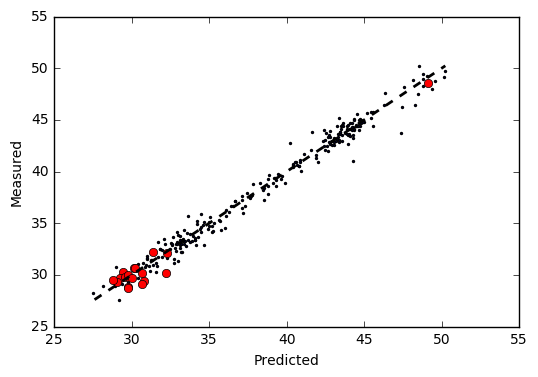

In [7]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
y = yahoo_target
predicted = cross_val_predict(lr, yahoo_feature_t1, y, cv=10)
# sklearn.cross_validation.cross_val_predict(estimator, X, y=None, cv=None, 
#                                            n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# X為機器學習數據， y為回歸目標， cv為交叉驗証時資料切分的依據，
# 範例為10則將資料切分為10等分，以其中9等分為訓練集，另外一等分則為測試集。

#from sklearn.externals import joblib
#joblib.dump(lr,"./lr_machine.pkl")
# 使用joblib.dump將線性回歸預測器匯出為pkl檔。
# 參照其他關於pickle的解釋?
# 本處應該只是示範可以儲存成pkl檔後再讀取，可省略

'''
接著使用lr=joblib.load("./lr_machine.pkl")將pkl檔匯入為一個linear regression預測器lr。
接著使用波士頓房地產數據(boston.data)，以及預測目標(y)來訓練預測機lr lr.fit(boston.data, y)。
最後，使用predict_y=lr.predict(boston.data[2])預測第三筆資料的價格，並將結果存入predicted_y變數。
'''
#lr=joblib.load("./lr_machine.pkl")
# 讀取使用joblib.load，儲存使用joblib.dump

lr.fit(yahoo_feature_t1, y)
predict_y=lr.predict(yahoo_feature_t1[2])
predict_test=lr.predict(yahoo_testSVR_feature_t1)

print('score =',lr.score(yahoo_feature_t1, y))
print('score =',lr.score(yahoo_testSVR_feature_t1, yahoo_testSVR_target))

# 預測第2個樣本(second row)的y

plt.scatter(predicted, y, s=2)
plt.plot(predict_y, y[2], 'ro')
plt.plot(predict_test, yahoo_testSVR_target, 'ro')
# 圖中紅點

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# 繪製虛線

plt.xlabel('Predicted')
plt.ylabel('Measured')

('score =', 0.9828165591242406)
('score =', 0.18848710967505644)


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


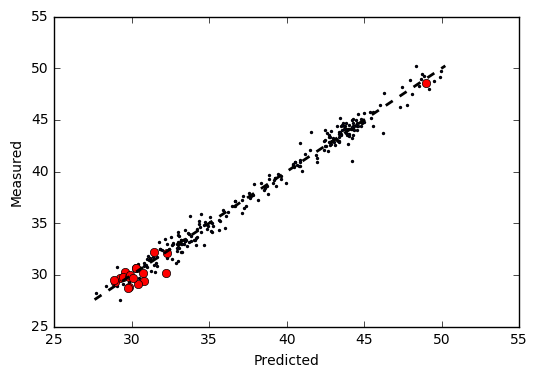

In [6]:
from sklearn.linear_model import Lasso

X = yahoo_feature_t1
clf2 = Lasso(alpha=0.1)
clf2.fit(X, y)

predict_y=clf2.predict(yahoo_feature_t1[2])
predict_test=clf2.predict(yahoo_testSVR_feature_t1)

predict=clf2.predict(X)
print('score =',clf2.score(yahoo_feature_t1, y))
print('score =',clf2.score(yahoo_testSVR_feature_t1, yahoo_testSVR_target))

plt.scatter(predict,y,s=2)
plt.plot(predict_y, y[2], 'ro')
plt.plot(predict_test, yahoo_testSVR_target, 'ro')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')